In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Naive Bayes classifier
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.8472222222222222


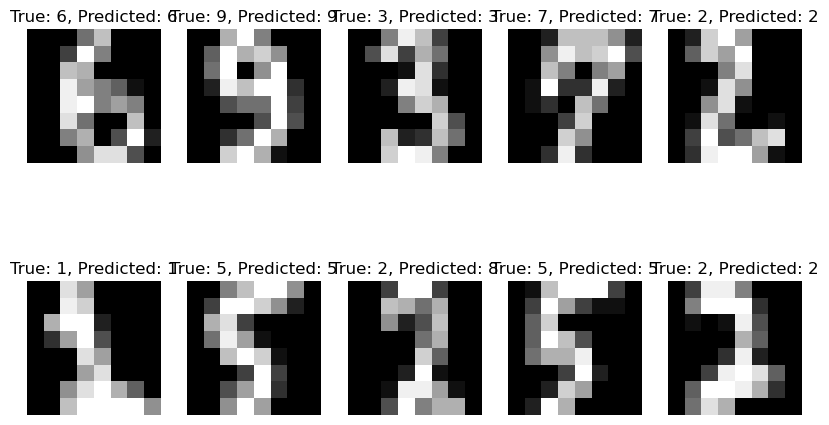

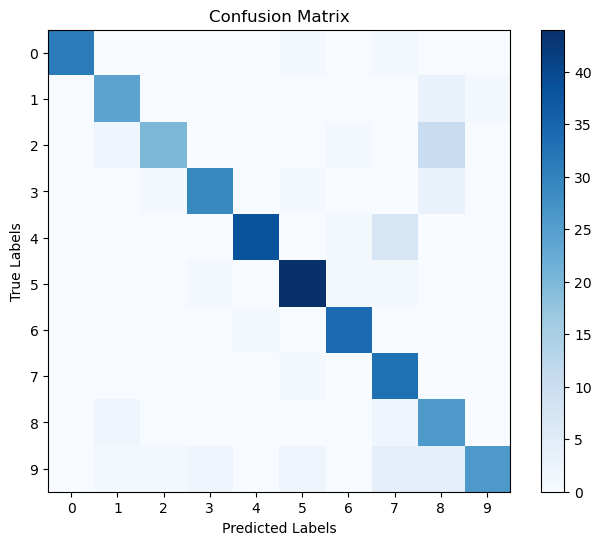

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize some of the test set predictions
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"True: {y_test[i]}, Predicted: {predictions[i]}")
    plt.axis('off')
plt.show()

# Confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()

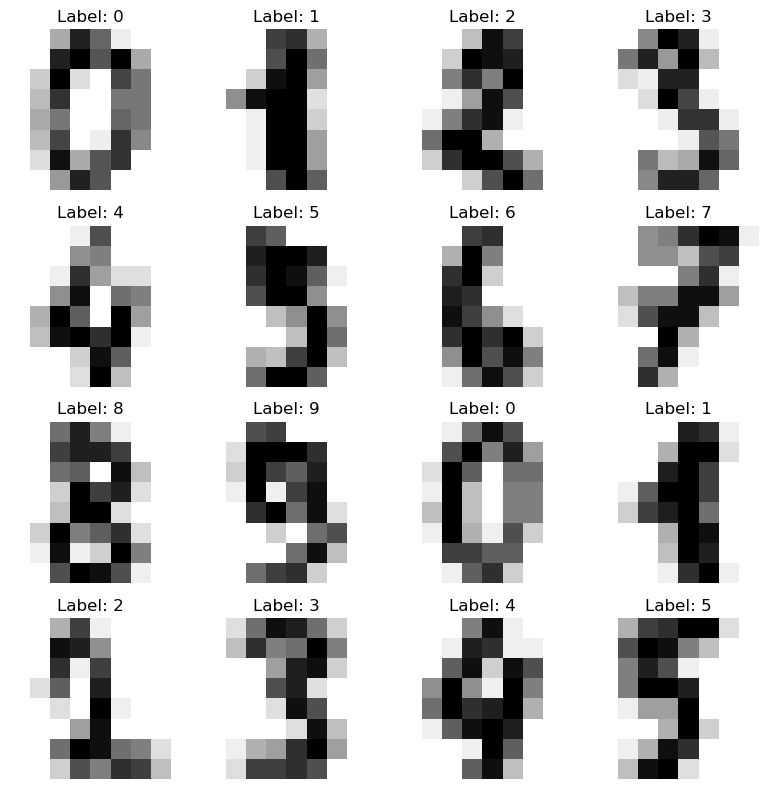

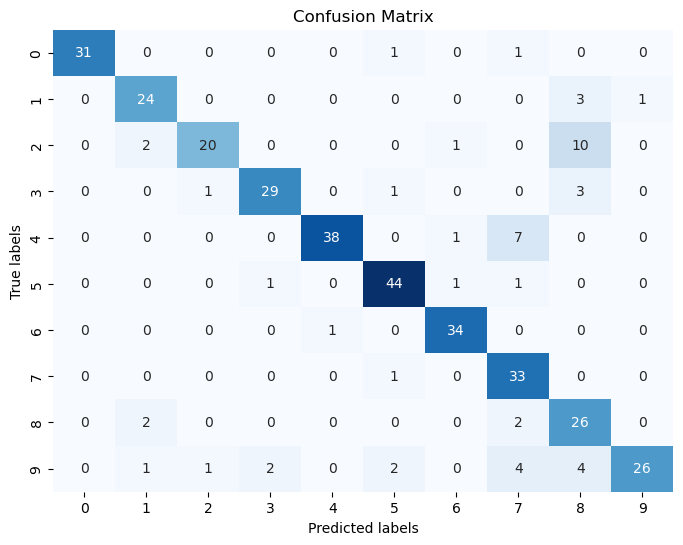

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize some sample digits
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(8, 8), cmap='binary')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Visualize confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [6]:
from sklearn.metrics import classification_report
# Generate classification report
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.83      0.86      0.84        28
           2       0.91      0.61      0.73        33
           3       0.91      0.85      0.88        34
           4       0.97      0.83      0.89        46
           5       0.90      0.94      0.92        47
           6       0.92      0.97      0.94        35
           7       0.69      0.97      0.80        34
           8       0.57      0.87      0.68        30
           9       0.96      0.65      0.78        40

    accuracy                           0.85       360
   macro avg       0.86      0.85      0.84       360
weighted avg       0.88      0.85      0.85       360



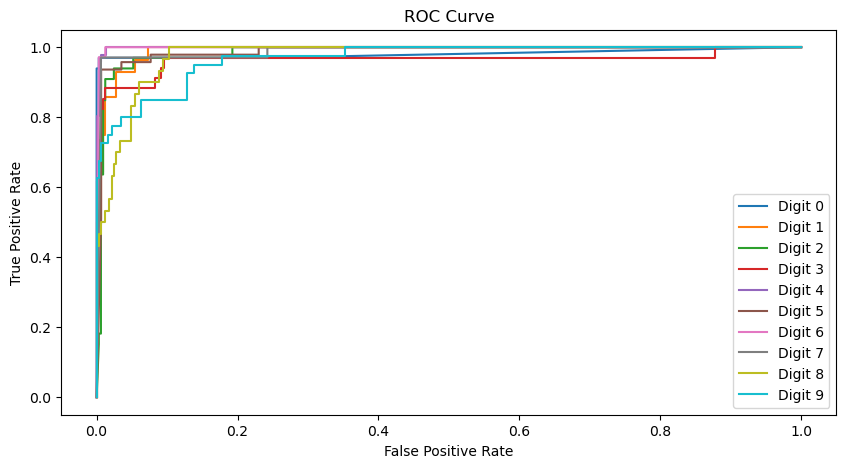

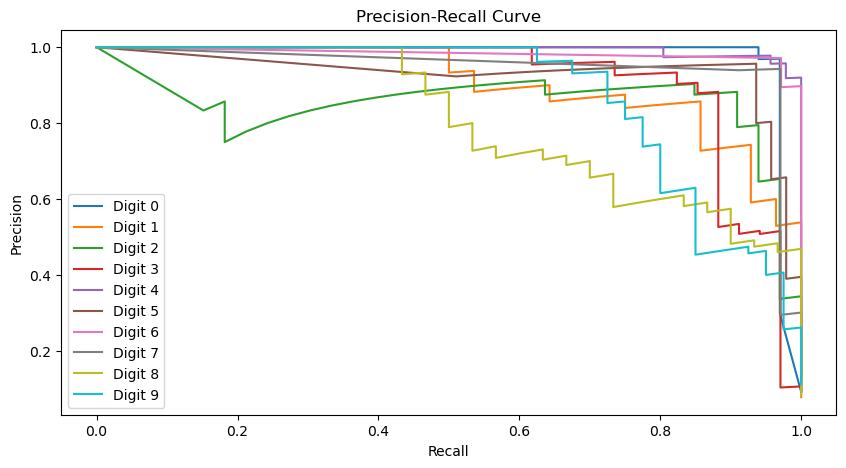

In [7]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Get predicted probabilities for each class
y_probs = model.predict_proba(X_test)

# ROC Curve
plt.figure(figsize=(10, 5))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test, y_probs[:, i], pos_label=i)
    plt.plot(fpr, tpr, label=f'Digit {i}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(10, 5))
for i in range(10):
    precision, recall, _ = precision_recall_curve(y_test, y_probs[:, i], pos_label=i)
    plt.plot(recall, precision, label=f'Digit {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


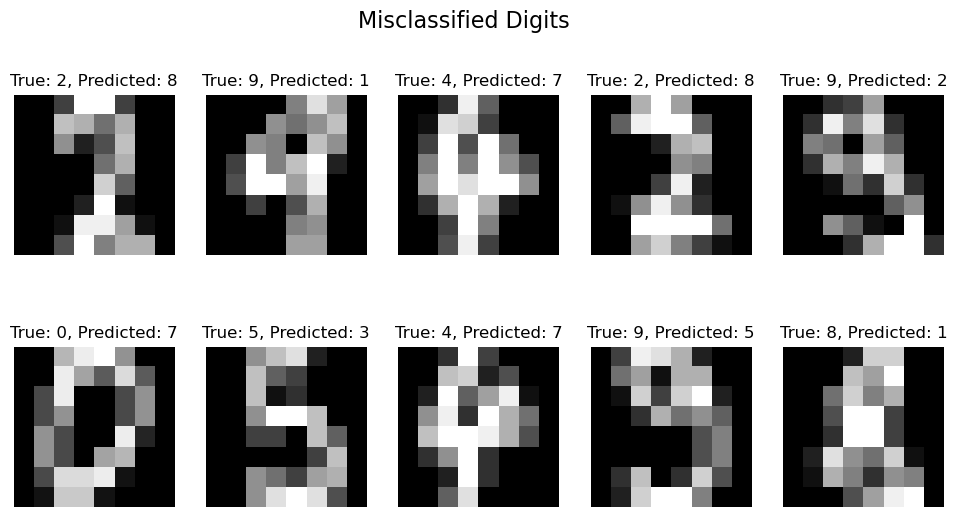

In [8]:
misclassified_indices = np.where(predictions != y_test)[0]

plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(8, 8), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Predicted: {predictions[idx]}")
    plt.axis('off')
plt.suptitle('Misclassified Digits', fontsize=16)
plt.show()
